In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from utils.eda import summary

In [4]:
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
submission_df = pd.read_csv('sample_submission.csv')

In [17]:
summary_df = summary(train_df)
summary_df

data shape: (165034, 14)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
id,int64,0,0.00,165034,0.00,"165,033.00","82,516.50","47,641.36",0,1,2
CustomerId,int64,0,0.00,23221,"15,565,701.00","15,815,690.00","15,692,005.02","71,397.82",15674932,15749177,15694510
Surname,object,0,0.00,2797,NaN,NaN,NaN,NaN,Okwudilichukwu,Okwudiliolisa,Hsueh
CreditScore,int64,0,0.00,457,350.00,850.00,656.45,80.10,668,627,678
Geography,object,0,0.00,3,NaN,NaN,NaN,NaN,France,France,France
Gender,object,0,0.00,2,NaN,NaN,NaN,NaN,Male,Male,Male
Age,float64,0,0.00,71,18.00,92.00,38.13,8.87,33.00,33.00,40.00
Tenure,int64,0,0.00,11,0.00,10.00,5.02,2.81,3,1,10
Balance,float64,0,0.00,30075,0.00,"250,898.09","55,478.09","62,817.66",0.00,0.00,0.00
NumOfProducts,int64,0,0.00,4,1.00,4.00,1.55,0.55,2,2,2


In [56]:
cat_cols = [column for column in train_df.columns if train_df[column].dtype == 'object']
num_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

num_cols.remove('id')
num_cols.remove('CustomerId')
num_cols.remove('IsActiveMember')
num_cols.remove('HasCrCard')
num_cols.remove('Exited')
cat_cols.remove('Surname')
cat_cols.append('IsActiveMember')
cat_cols.append('HasCrCard')

train_df['HasCrCard'].astype('category')
train_df['IsActiveMember'].astype('category');

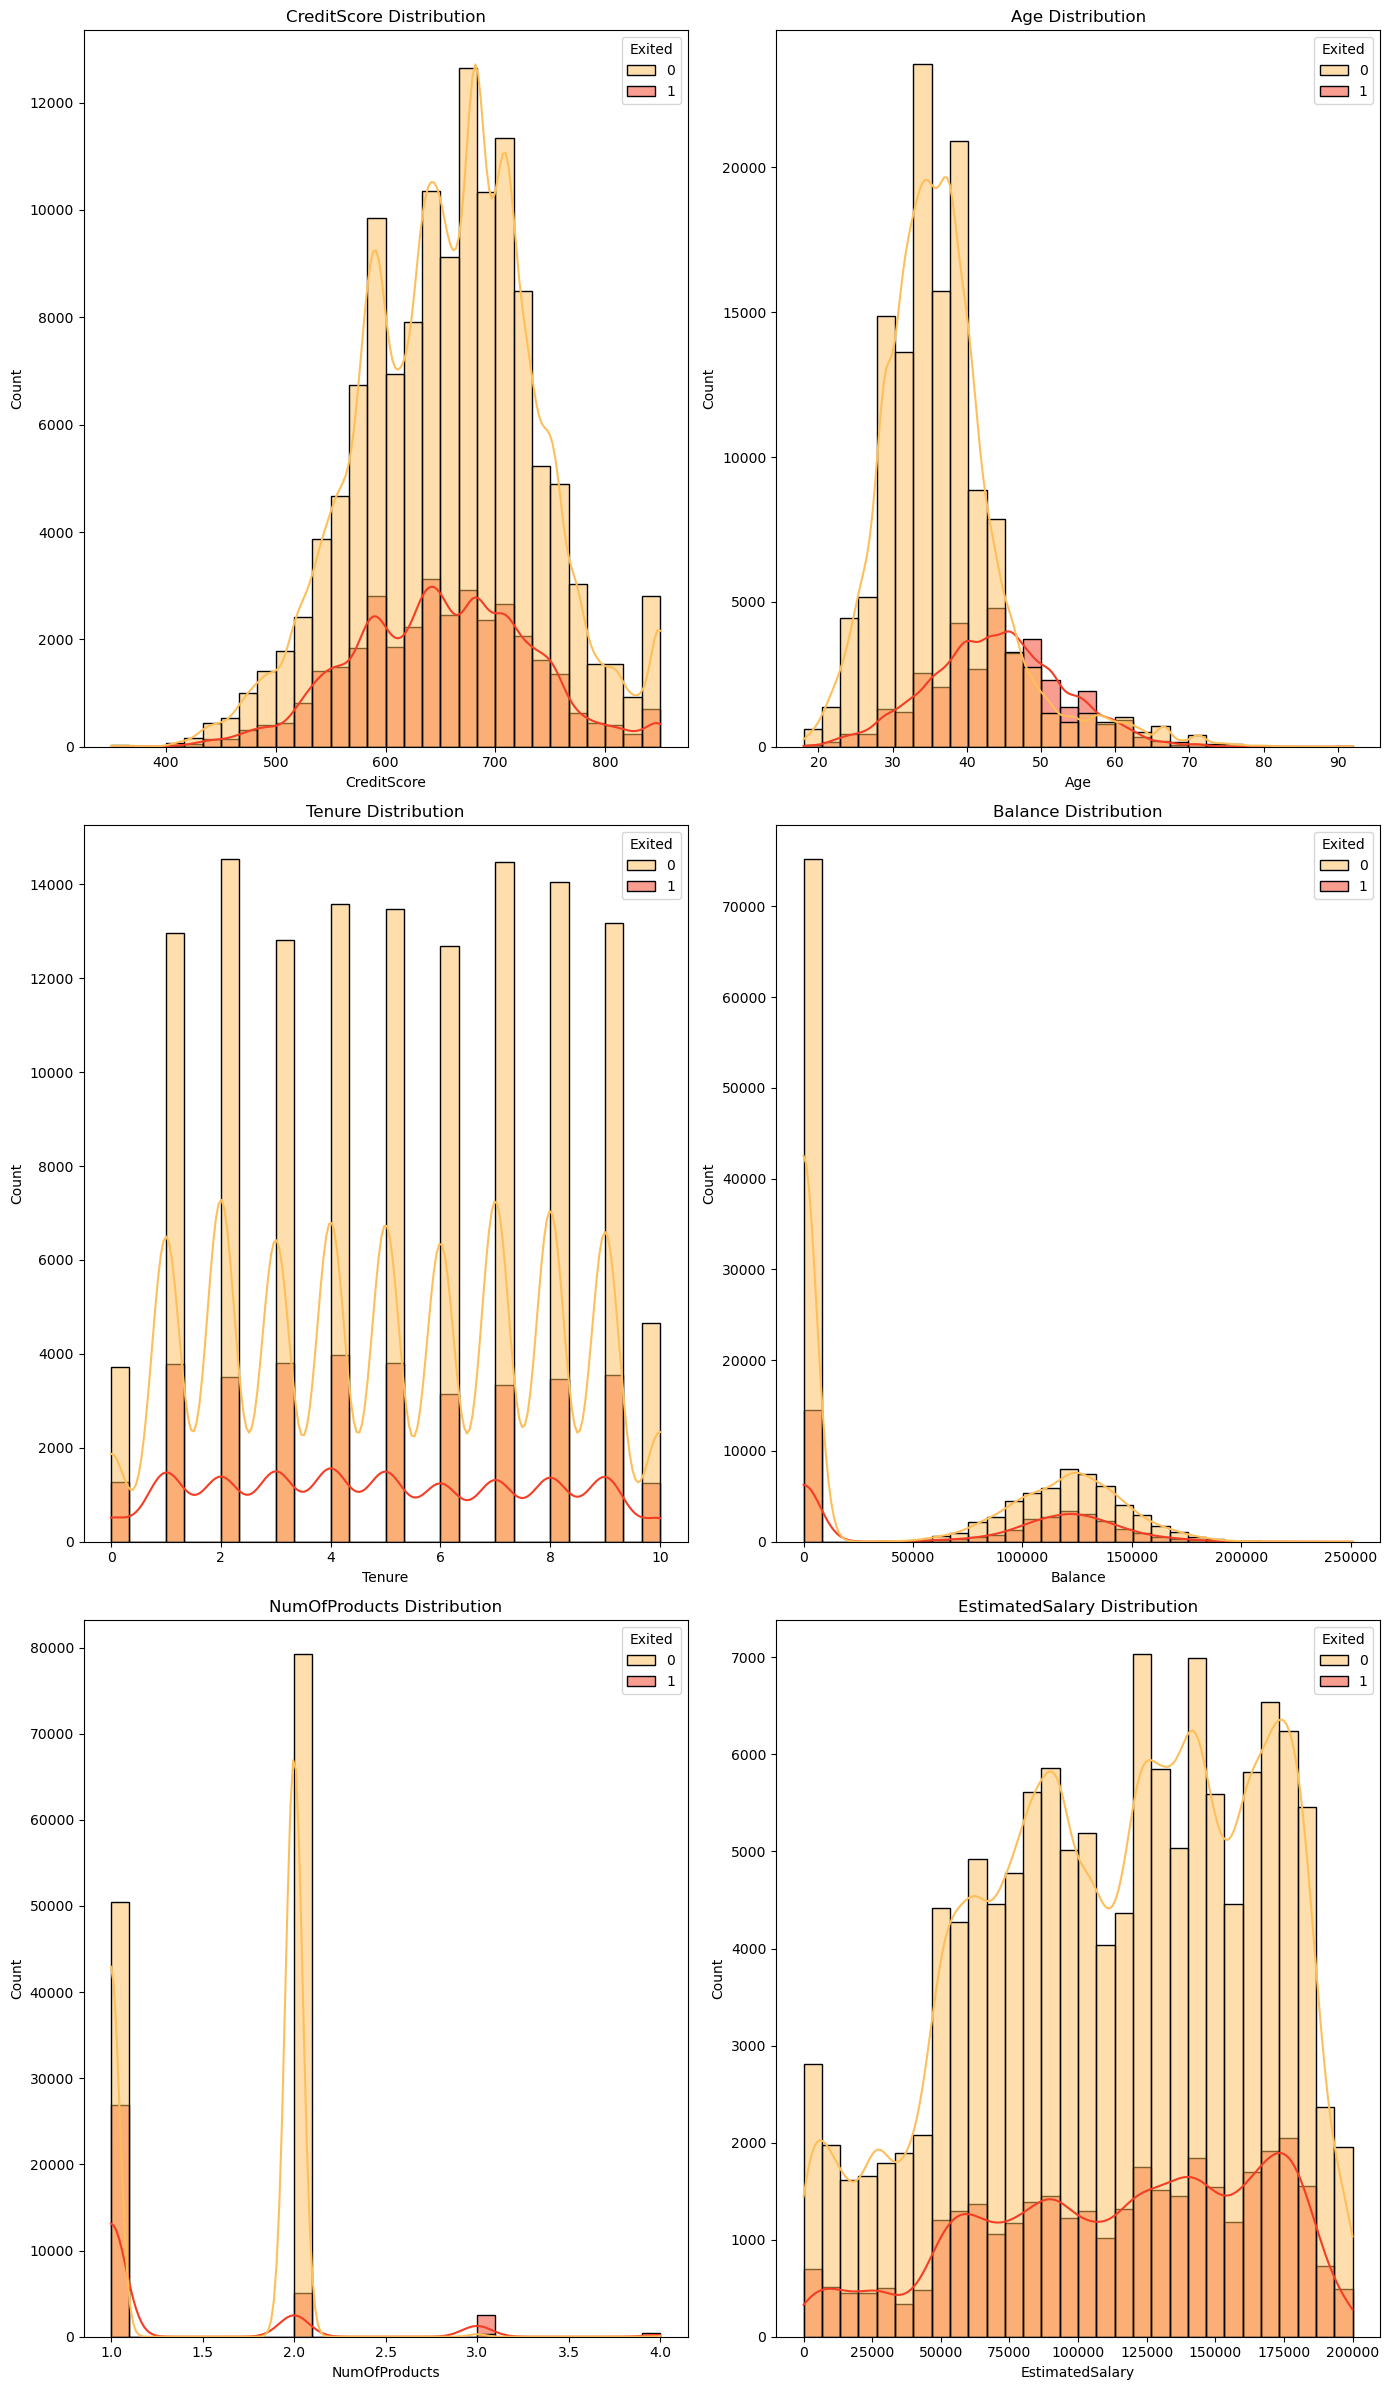

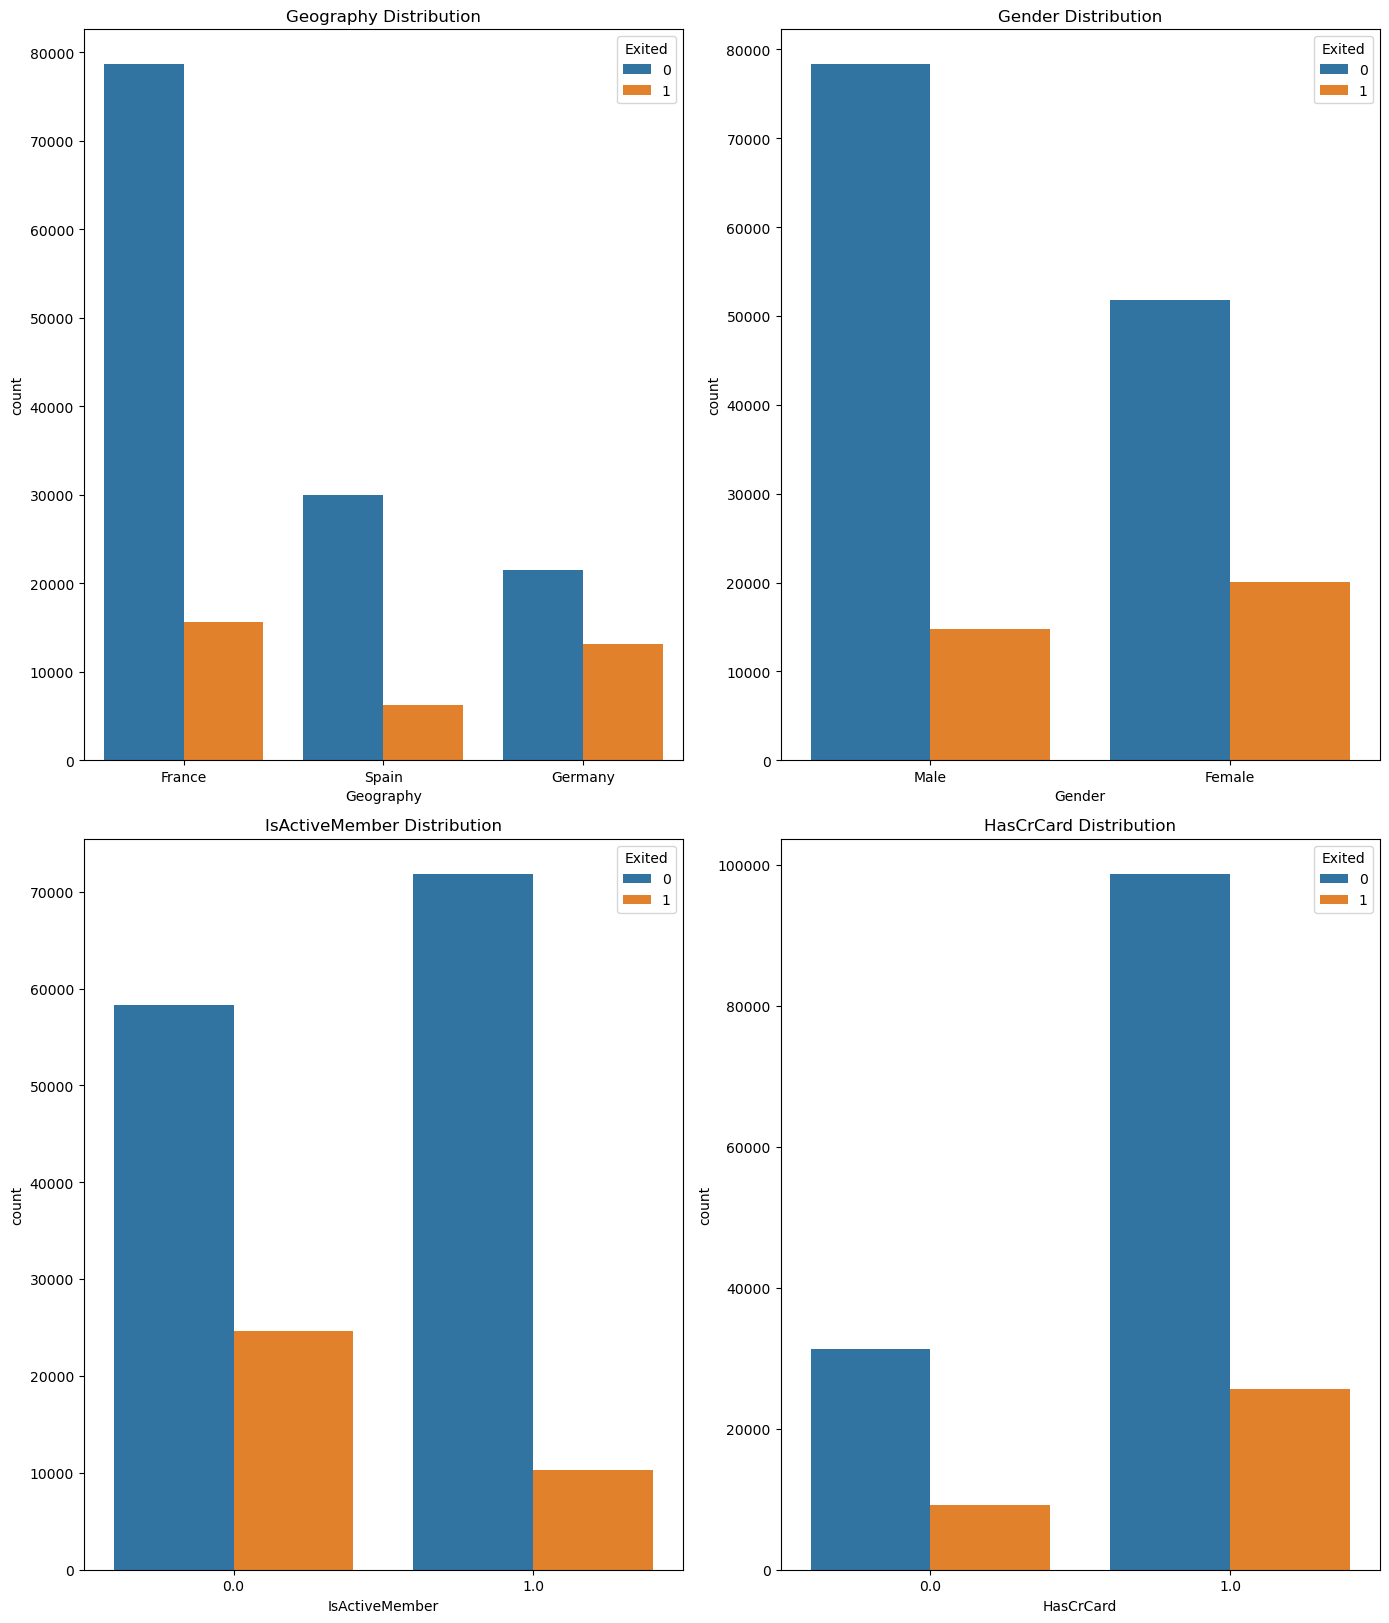

In [64]:
plt.figure(figsize=(14, len(num_cols)*4))

for idx, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//2 + len(num_cols)%2, 2, idx+1)
    sns.histplot(x=col, hue="Exited", data=train_df, bins=30, kde=True, palette='YlOrRd')
    plt.title(f"{col} Distribution")
    plt.tight_layout()
    
plt.show()

plt.figure(figsize=(14, len(num_cols)*4))
for idx, col in enumerate(cat_cols):
    plt.subplot(len(num_cols)//2 + len(num_cols)%2, 2, idx+1)
    sns.countplot(data=train_df, x=col, hue='Exited')
    plt.title(f"{col} Distribution")
    plt.tight_layout()

plt.show()

<Figure size 1800x1000 with 0 Axes>

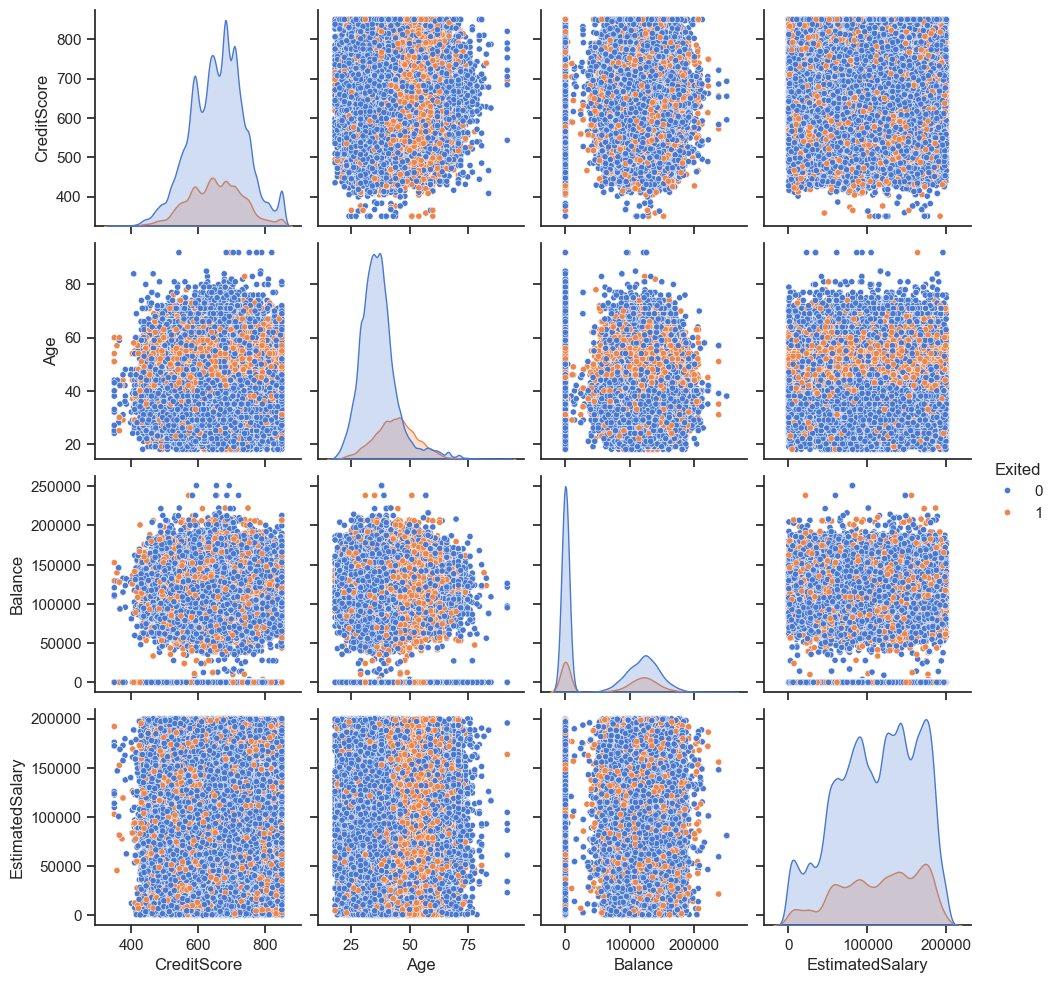

In [77]:
pair_plot_cols=[f for f in num_cols if train_df[f].nunique()>50]

sns.set(font_scale=1)
plt.figure(figsize=(18, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=train_df, vars=pair_plot_cols,diag_kind='kde', 
        kind='scatter', palette='muted', 
        plot_kws={'s': 20}, hue='Exited')
plt.show()

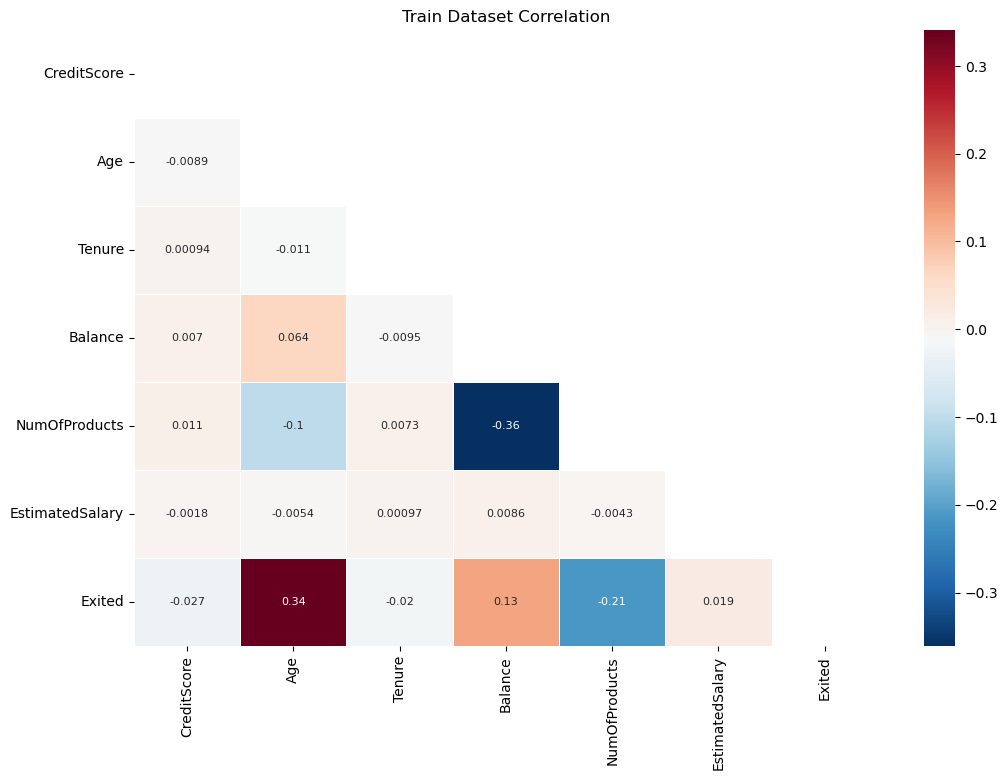

In [69]:
def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Train correlation') -> None:

    corr = df.corr()
    fig, axes = plt.subplots(figsize=(12, 8))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='RdBu_r', annot=True,annot_kws={"size": 8})
    plt.title(title_name)
    plt.show()


plot_correlation_heatmap(train_df[num_cols+['Exited']], 'Train Dataset Correlation')